# Hands-on Activity 4.1: Advanced Data Analytics and Machine Learning

| name| course/section | date submitted | date performed |
|---|---|---|---|
| John Edward Binay | CPE 019-CPE32S2| 2022-02-26 | 2020-02-26 |

In [90]:
#Import the libraries and dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [99]:
df_all = pd.read_csv(r"C:\Users\core i5\Documents\GitHub\DataScience\datascience\CPE 019\titanic_all.csv")
df_test = pd.read_csv(r"C:\Users\core i5\Documents\GitHub\DataScience\datascience\CPE 019\titanic_test.csv")
df_train = pd.read_csv(r"C:\Users\core i5\Documents\GitHub\DataScience\datascience\CPE 019\titanic_train.csv")

In [17]:
print(df_train.shape[0]/df_all.shape[0])

0.6811926605504587


Since the train dataset is about 70 percent of the df_all dataset we will train-test split the df_all into 70% train and 30% test. We will not use the test set since we don't have the "survive column" and we cannot map out the survive column of the df_all set to the datapoints in the test set. 

## Exploratory Data Analysis

In [19]:
df_all.head()

Passenger  Survived  Pclass  \
0          1         1       1   
1          2         1       1   
2          3         0       1   
3          4         0       1   
4          5         0       1   

                                              Name  Gender      Age  SibSp  \
0                    Allen, Miss. Elisabeth Walton  female  29.0000      0   
1                   Allison, Master. Hudson Trevor    male   0.9167      1   
2                     Allison, Miss. Helen Loraine  female   2.0000      1   
3             Allison, Mr. Hudson Joshua Creighton    male  30.0000      1   
4  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female  25.0000      1   

   Parch  Ticket      Fare    Cabin Embarked  
0      0   24160  211.3375       B5        S  
1      2  113781  151.5500  C22 C26        S  
2      2  113781  151.5500  C22 C26        S  
3      2  113781  151.5500  C22 C26        S  
4      2  113781  151.5500  C22 C26        S

In [18]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308 entries, 0 to 1307
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Passenger  1308 non-null   int64  
 1   Survived   1308 non-null   int64  
 2   Pclass     1308 non-null   int64  
 3   Name       1308 non-null   object 
 4   Gender     1308 non-null   object 
 5   Age        1045 non-null   float64
 6   SibSp      1308 non-null   int64  
 7   Parch      1308 non-null   int64  
 8   Ticket     1308 non-null   object 
 9   Fare       1308 non-null   float64
 10  Cabin      295 non-null    object 
 11  Embarked   1306 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


We can see that the columns of Age, Cabin, and Embarked are missing some values. Sinc Cabin is missing a lot of values, we should just drop it. We also need to drop name and Passenger since those columns are irrelevant. Let us drop the columns as well as the remaining rows with missing data and see how much data we have left.

In [100]:
df_all.drop(['Passenger','Name','Cabin'],axis=1,inplace=True)

<AxesSubplot:>

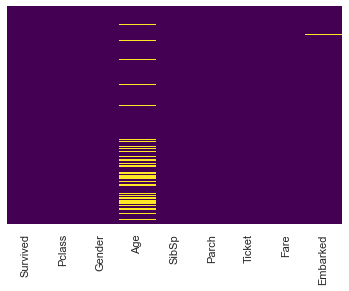

In [38]:
sns.heatmap(df_all.isnull(),yticklabels=False,cbar=False,cmap='viridis')

It seems we still have a few missing values, more so in the Age column and only 1 in the Embarked column

In [101]:
df_all_v1 = df_all.dropna(axis = 0)
df_all_v1.shape

(1043, 9)

In [30]:
df_all_v1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1043 entries, 0 to 1307
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1043 non-null   int64  
 1   Pclass    1043 non-null   int64  
 2   Gender    1043 non-null   object 
 3   Age       1043 non-null   float64
 4   SibSp     1043 non-null   int64  
 5   Parch     1043 non-null   int64  
 6   Ticket    1043 non-null   object 
 7   Fare      1043 non-null   float64
 8   Embarked  1043 non-null   object 
dtypes: float64(2), int64(4), object(3)
memory usage: 113.8+ KB


<AxesSubplot:xlabel='Survived', ylabel='count'>

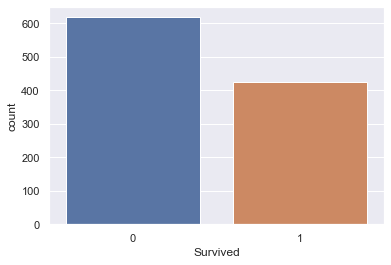

In [39]:
sns.countplot(x='Survived',data=df_all_v1)

It seems there are rougly 200 more passengers that dies than survived.

<AxesSubplot:xlabel='Survived', ylabel='count'>

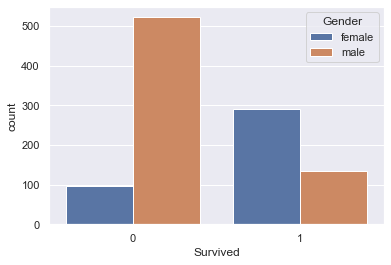

In [44]:
sns.countplot(x='Survived',data=df_all_v1, hue = "Gender")

Significantly more males died than survived, and the opposite is true for females. If our passenger is female, it may be the case that the passenger could have likely survived. Also comparing the male and female mortality, it seems more males died.

<AxesSubplot:xlabel='Survived', ylabel='count'>

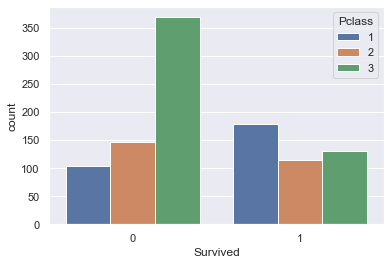

In [45]:
sns.countplot(x='Survived',data=df_all_v1, hue = "Pclass")

If you are of Pclass 3, you would have likely died compared to the other passengers that are in other Pclass membership. It isn't clear if having Pclass 2 could predict survival since the amounts of people in Pclass 2 that died and survived are almost the same. For P1, the diference between survuved and not survived is still somewhat close but certainly not as obvious as the stats for Pclass 3.

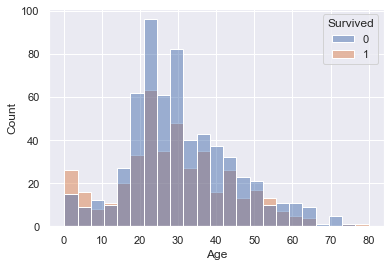

In [57]:
sns.histplot(x=df_all_v1.Age, hue=df_all_v1.Survived);

We can see that it seems most people that died are in the mid-range age. From 15 - 20, most people died than survived. The highest fatalities relevant to survival is in the age range of 20 - 40. More than half of people at 40 and 60 above died. It seems the only ages where we see more survivors than deaths are 0-15 and people a bit older than 50. 

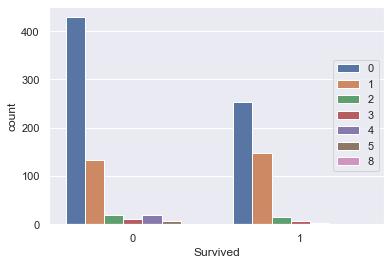

In [76]:
sns.countplot(x='Survived',data=df_all_v1, hue = "SibSp")
plt.legend(loc="right")

Most of the ones that died belong in SiSip 0 and 1. The same can be said for the ones that survived. 

<AxesSubplot:xlabel='Survived', ylabel='count'>

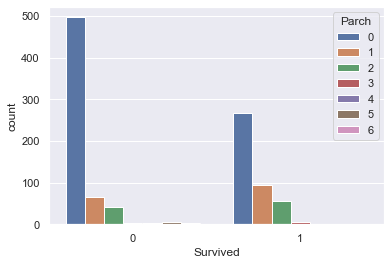

In [121]:
sns.countplot(x='Survived',data=df_all_v1, hue = "Parch")

Parc 0, 1, and 2 are the top 3 categories under Parch that titanic people are associated with that either died or survived. It seems more people under Parch 0 died compared to 

5   Parch     1043 non-null   int64  
 6   Ticket    1043 non-null   object 
 7   Fare      1043 non-null   float64
 8   Embarked  1043 non-null   object 

We have 3 object type columns. Let us see what their unique values are.

In [37]:
df_all_v1_obj_cols = df_all_v1.select_dtypes(include=['object']).columns
for i in df_all_v1_obj_cols:
    print(df_all_v1[i].value_counts())

male      657
female    386
Name: Gender, dtype: int64
CA 2144          8
347077           7
PC 17608         7
3101295          7
347082           7
                ..
PC 17476         1
SC/Paris 2163    1
112277           1
C 7075           1
347089           1
Name: Ticket, Length: 730, dtype: int64
S    781
C    212
Q     50
Name: Embarked, dtype: int64


# Part 1: Simple Linear Regression

Okay, it seems we still have a lot of data to work with. Linear Regression works best with continous variables. Let us create a dataframe with on the continous variables.

In [102]:
ports = {"male": 0, "female":1}
df_all_v1_copy = df_all_v1.copy()
df_all_v1_copy["Gender"] = df_all_v1_copy["Gender"].map(ports)

In [103]:
df_all_v1_copy

Survived  Pclass  Gender      Age  SibSp  Parch  Ticket      Fare  \
0            1       1       1  29.0000      0      0   24160  211.3375   
1            1       1       0   0.9167      1      2  113781  151.5500   
2            0       1       1   2.0000      1      2  113781  151.5500   
3            0       1       0  30.0000      1      2  113781  151.5500   
4            0       1       1  25.0000      1      2  113781  151.5500   
...        ...     ...     ...      ...    ...    ...     ...       ...   
1300         0       3       0  45.5000      0      0    2628    7.2250   
1303         0       3       1  14.5000      1      0    2665   14.4542   
1305         0       3       0  26.5000      0      0    2656    7.2250   
1306         0       3       0  27.0000      0      0    2670    7.2250   
1307         0       3       0  29.0000      0      0  315082    7.8750   

     Embarked  
0           S  
1           S  
2           S  
3           S  
4           S  
...       ...  
1300        C  
1303        C  
1305        C  
1306        C  
1307        S  

[1043 rows x 9 columns]

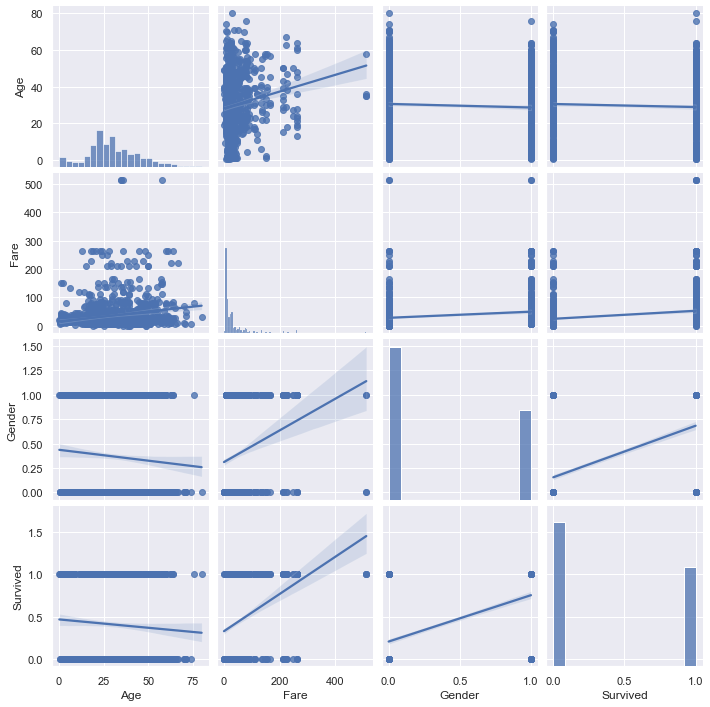

In [113]:
sns.pairplot(df_all_v1_copy.loc[:,["Age", "Ticket", "Fare", "Gender","Survived"]], kind = 'reg')

Fare and Survived, Fare and Age, and Fare and Gender seem to have a strong correlation. We will try the predict the Survived using Fare. What we have here is point-biserial correlation. Which gives us the correlation between an continous variable and a dichotomous variable.

In [114]:
# Import necessary modules.
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [117]:
#split the dataset
X_train, X_test, y_train, y_test = train_test_split(df_all_v1_copy.Fare,df_all_v1_copy.Survived, test_size = 0.3, random_state = 42)

(730,)